In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

%matplotlib inline
sns.set(style='white')
colors = [['dimgray', 'forestgreen', 'red', 'navy', 'royalblue', 'maroon'],
          ['dimgray', 'forestgreen', 'red', 'maroon', 'royalblue', 'navy', 'purple'],
          ['forestgreen', 'red', 'royalblue']]

np.random.seed(0)

In [4]:
# Loading the data

dataset_3 = pd.read_csv('data/cluster_ds3.csv',
                  header=0,
                  index_col=None)

dataset_4 = pd.read_csv('data/cluster_ds4.csv',
                  header=0,
                  index_col=None)

dataset_5 = pd.read_csv('data/cluster_ds5.csv',
                  header=0,
                  index_col=None)

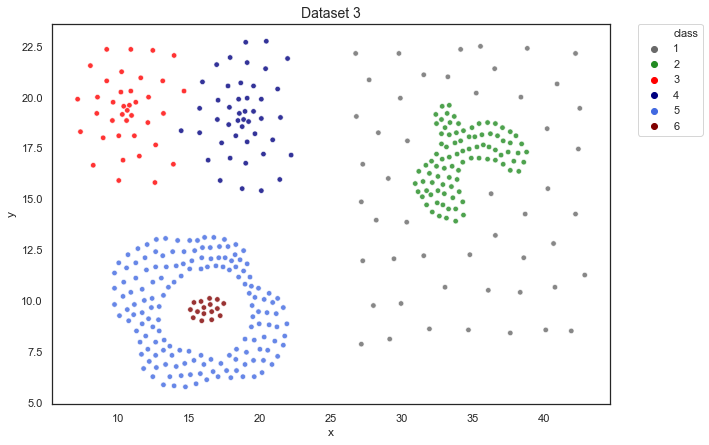

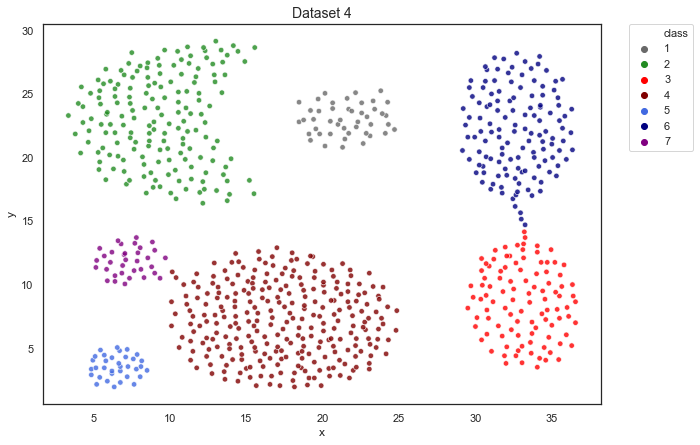

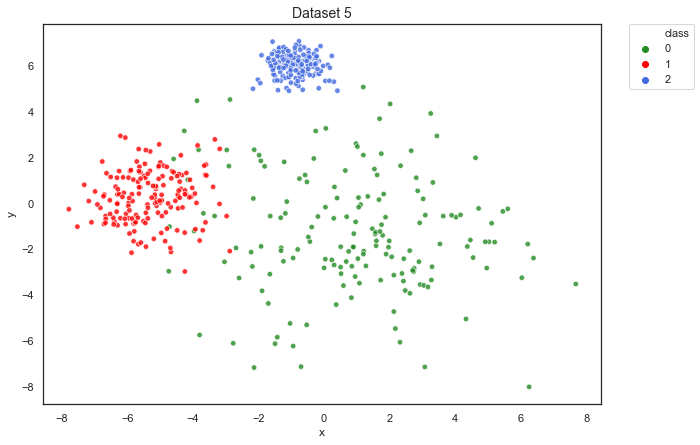

In [5]:
# Original clusters

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_3,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[0])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 3', fontsize=14)
plt.show()
plt.close()

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_4,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[1])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 4', fontsize=14)
plt.show()
plt.close()

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_5,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[2])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 5', fontsize=14)
plt.show()
plt.close()

In [6]:
# Data Analysis

print('=> Dataset 3\n')
dataset_3.info()
print('\n=> Dataset 4\n')
dataset_4.info()
print('\n=> Dataset 5\n')
dataset_5.info()

=> Dataset 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
x        399 non-null float64
y        399 non-null float64
class    399 non-null int64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB

=> Dataset 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
x        788 non-null float64
y        788 non-null float64
class    788 non-null int64
dtypes: float64(2), int64(1)
memory usage: 18.6 KB

=> Dataset 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
x        500 non-null float64
y        500 non-null float64
class    500 non-null int64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [7]:
print('\n=> Dataset 3')
dataset_3.describe()
print('\n=> Dataset 4')
dataset_4.describe()
print('\n=> Dataset 5')
dataset_5.describe()


=> Dataset 3

=> Dataset 4

=> Dataset 5


,x,y,class
count,500.000000,500.000000,500.000000
mean,-1.762312,1.651048,0.998000
std,3.076568,3.566898,0.816903
min,-7.779000,-8.029000,0.000000
25%,-4.657750,-0.872750,0.000000
50%,-1.232000,0.942500,1.000000
75%,-0.174500,5.706500,2.000000
max,7.674000,7.083000,2.000000


In [10]:
# Data preprocessing

def feature_matrix(df):
    return df[['x', 'y']].to_numpy()

In [11]:
def plot_cluster(df, k, algorithm):
    
    fig = plt.figure(figsize=[14, 5])
    
    sp1 = fig.add_subplot(121)
    sc1 = sns.scatterplot(data=df,
                          x='x',
                          y='y',
                          hue='class',
                          s=30, alpha=0.8,
                          legend='full',
                          palette=sns.color_palette(n_colors=k))
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp2 = fig.add_subplot(122)
    sc2 = sns.scatterplot(data=df,
                    x='x',
                    y='y',
                    hue=algorithm,
                    s=30, alpha=0.8,
                    legend='full',
                    palette=sns.color_palette(n_colors=k))
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp1.title.set_text('Original clusters')
    sp2.title.set_text('Predicted clusters')
    
    t = plt.suptitle(algorithm, fontsize=20)
    plt.tight_layout()
    t.set_y(0.95)
    plt.subplots_adjust(top=0.85)
    plt.show()
    plt.close()

In [59]:
# Basic Clustering Algorithms
# Required for DB Scan
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr
from matplotlib.colors import ListedColormap


def cluster(df, k, kn):
    kmeans = KMeans(n_clusters=k, n_init=50).fit(feature_matrix(df))
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    df['kmeans'] = labels
    #plot_cluster(df, k, 'kmeans')
    
    aggcluster = AgglomerativeClustering(n_clusters=k).fit(feature_matrix(df))
    labels = aggcluster.labels_
    df['agg'] = labels
    #plot_cluster(df, k, 'agg')
    
    # Computing hyperparameters minpts and eps for DBSCAN
    
    # Create a NearestNeighbors object, fit the data, then get the 4 nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=kn).fit(df)
    distances, indices = nbrs.kneighbors(df)
    #print(distances)

    # Get the indexes of the array sorted by the 4th nearest neighbor
    sorted_ix = distances[:,kn-1].argsort()
    #print(sorted_ix)

    # Extract the plot y values
    px = list(range(len(distances)))
    py = distances[sorted_ix,kn-1]
    
    # Finding the knee point using vector projection
    N = len(py)

    # Coordinates of all points on the curve
    points_along_curve = np.column_stack([px, py])

    # get the first point (origin)
    first_point = points_along_curve[0]

    # vector we're projecting onto
    b = points_along_curve[-1] - points_along_curve[0]

    # length of b
    b_norm = np.linalg.norm(b)

    b_hat = b / b_norm

    # list of vectors (from first_point to every point along the curve)
    a = points_along_curve - first_point

    # scalar projection of a onto b:
    a_1_norm = np.dot(a, b_hat)
    a_1      = np.outer(b_hat, a_1_norm).T

    # vector rejection:
    a_2 = a - a_1

    # Find the longest vector in a_2
    # That is, the longest projection onto line b
    best_ix = np.argmax(np.linalg.norm(a_2, axis=1))
    best_eps = py[best_ix]

    print("Knee: n={:d}, y={:.2f}".format(px[best_ix], best_eps))
    
    # Add code here to compute the values for eps and min_samples for the next line
    # Plot 'em
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(px, py, linestyle='-', linewidth=1)
    ax.plot(px[best_ix], py[best_ix], marker='.', c='red', markersize=5)
    ax.text(px[best_ix]-10, py[best_ix]+0.05, s='n={}, eps={:.2f}'.format(best_ix, best_eps), color='red', horizontalAlignment='right')
    ax.set_title('4th nearest neighbor distance')
    ax.set_xlabel('Instances (sorted by Kth nearest neighbor distance)')
    ax.set_ylabel('Eps')
    ax.grid()

    plt.show()
    
    # Cluster points using DBscan
    db = DBSCAN(eps=best_eps, min_samples=kn)
    y = db.fit_predict(df)
    print("We obtained {} clusters.".format(max(y)+1))
    
    # Custom colormap
    # The 0th color is gray, for noise points
    mycmap = ListedColormap([
        '#000000', '#e6194b', '#3cb44b', '#ffe119', 
        '#4363d8', '#f58231', '#911eb4', '#46f0f0', 
        '#f032e6', '#bcf60c', '#fabebe', '#008080', 
        '#e6beff', '#9a6324', '#fffac8', '#800000', 
        '#aaffc3', '#808000', '#ffd8b1', '#000075', 
        '#808080'
    ], name='mhb1', N=None)
    
    # Make pretty plot
    fig = plt.figure(figsize=(5,5), dpi=100)
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', c=y, s=20, edgecolor='None', cmap=mycmap)
    ax.set_title('Clustered points')
    plt.show()
    
    #labels = db.labels_
    #df['dbscan'] = labels
    #c = sns.color_palette('cubehelix', n_colors=len(set(labels)))

Knee: n=319, y=2.97


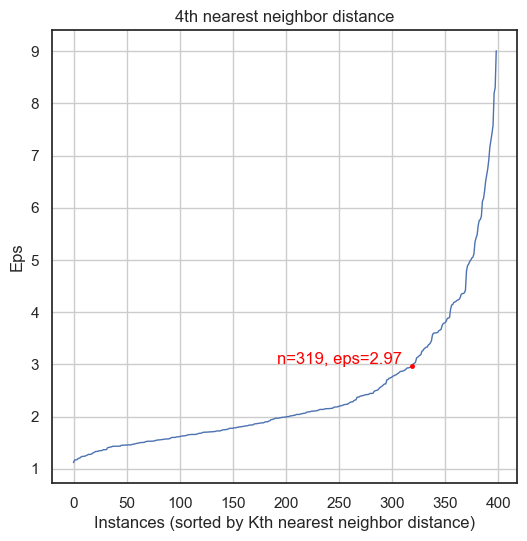

We obtained 6 clusters.
Knee: n=735, y=1.15


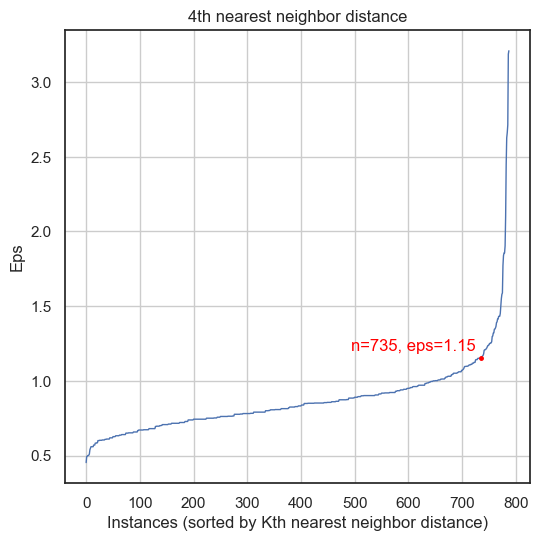

We obtained 10 clusters.
Knee: n=458, y=1.08


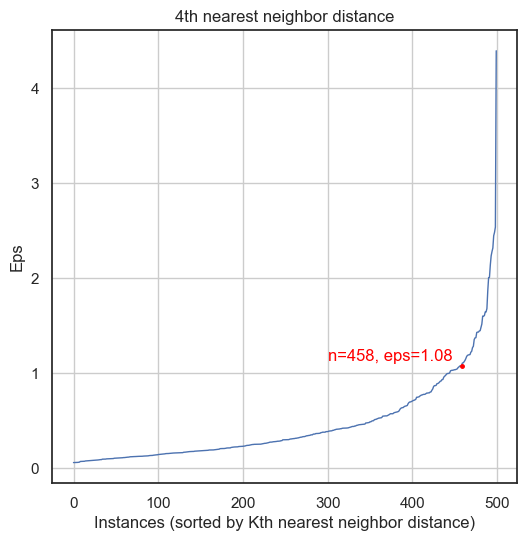

We obtained 5 clusters.


In [60]:
cluster(dataset_3, 6, 18)
cluster(dataset_4, 7, 4)
cluster(dataset_5, 3, 4)